<a href="https://colab.research.google.com/github/Almasyriqi/PCVK_Genap_2022/blob/main/Week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Modul 12 PCVK**

Nama : M. Syifa'ul Ikrom Almasyriqi

Kelas : TI-3G

NIM : 1941720057

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab 
terhubung dengan Github Anda, buat notebook baru dan beri nama “Week12.ipynb”. 
Kemudian import beberapa library dan akses folder yang ada di Drive Anda dengan 
seperti biasa.

In [ ]:
# import library yang dibutuhkan
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import PIL
import io
import html
import time
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode

In [ ]:
# akses drive
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


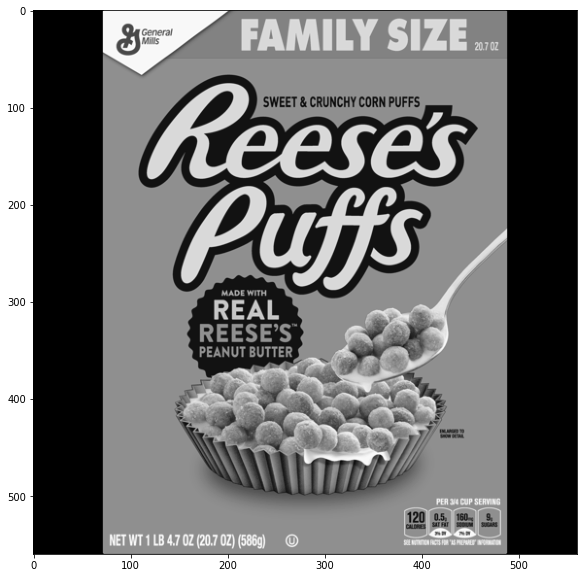

In [ ]:
# Orb Descriptor
def display(img, cmap='gray'):
  fig = plt.figure(figsize=(12,10))
  ax = fig.add_subplot(111)
  ax.imshow(img, cmap='gray')

reeses = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/facedet/reeses_puffs.png', 0)
display(reeses)

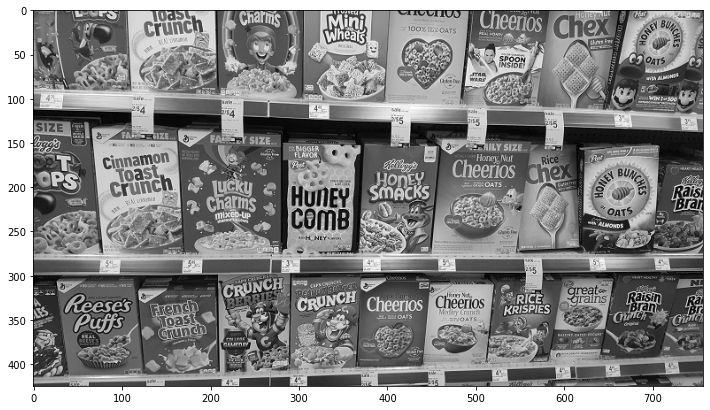

In [ ]:
cereals = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/facedet/many_cereals.jpg', 0)
display(cereals)

In [ ]:
orb = cv.ORB_create()
kp1,des1 = orb.detectAndCompute(reeses, None)
kp2,des2 = orb.detectAndCompute(cereals, None)
bf = cv.BFMatcher(cv.NORM_HAMMING,crossCheck= True)
matches = bf.match(des1, des2)
single_match = matches[0]
single_match.distance

71.0

In [ ]:
len(matches)

139

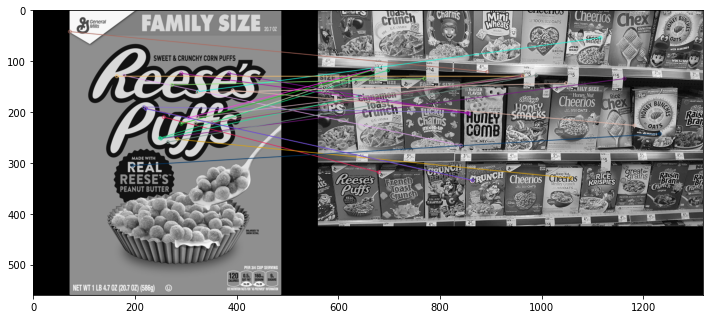

In [ ]:
matches = sorted(matches,key=lambda x:x.distance)
reeses_match = cv.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None,flags=2)
display(reeses_match)

In [ ]:
!pip install opencv-contrib-python==4.4.0.44

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55.7 MB 1.2 MB/s 
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [ ]:
# Algoritma SIFT
sift = cv.xfeatures2d.SIFT_create()
kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)

good = []

# Makin kecil jarak makin cocok
# ratio match1 < 75% match2
for match1,match2 in matches:
  # jika jarak match1 lebih kecil dari jarak 75% match2
  # descriptor disimpan
  if match1.distance < 0.75*match2.distance:
    good.append([match1])

len(good)

79

In [ ]:
len(matches)

1501

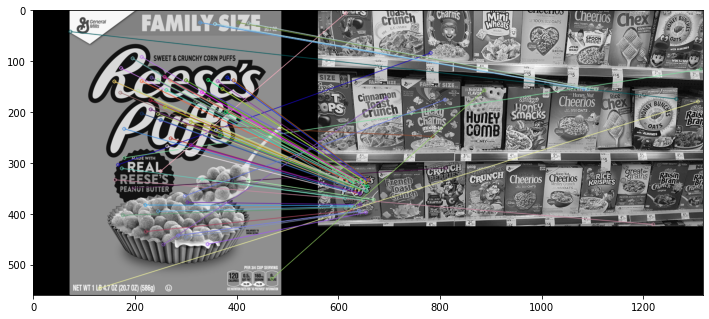

In [ ]:
sift_matches = cv.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)
display(sift_matches)

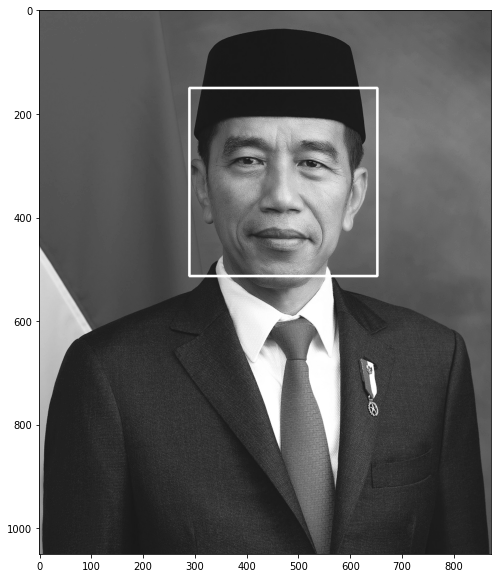

In [ ]:
# Face detection menggunakan algoritma Haarcascade classifier

cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/PCVK_MM/Images/haarcascades/haarcascade_frontalface_alt.xml')
jokowi = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/facedet/jokowi.jpg',0)
roi_wajah = cascade_wajah.detectMultiScale(jokowi)
for(x,y,w,h) in roi_wajah:
 cv.rectangle(jokowi,(x,y),(x+w,y+h),(255,255,255),3)
plt.figure(figsize = (10,10))
plt.imshow(jokowi, cmap='gray')

2. Lakukan Face Detection untuk image object lain yang tersedia pada (/images/facedet). 
Tampilkan seperti pada contoh berikut. 


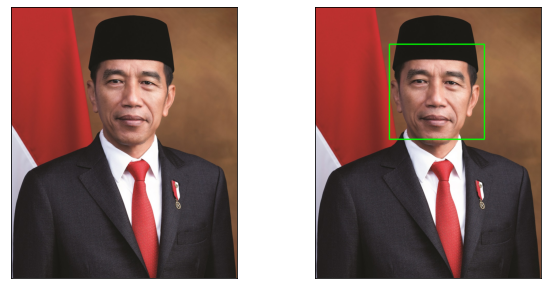

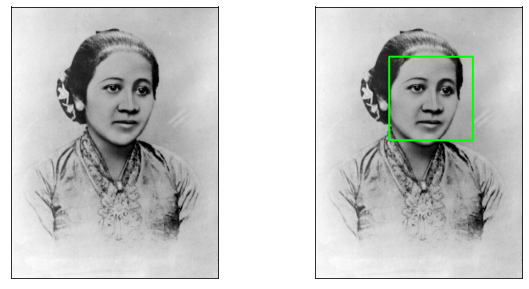

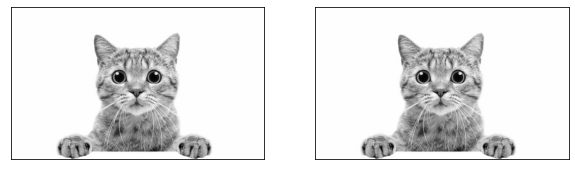

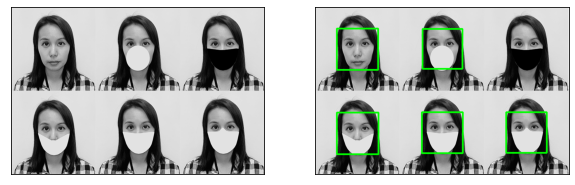

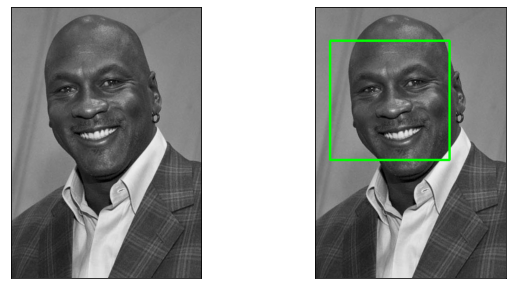

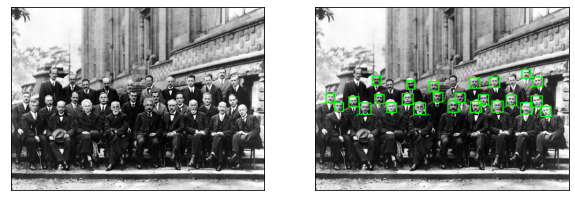

In [ ]:
# Face detection untuk image object yang tersedia pada (/images/facedet)

cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/PCVK_MM/Images/haarcascades/haarcascade_frontalface_alt2.xml')

# Input image
input1 = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/facedet/jokowi.jpg')
input1 = cv.cvtColor(input1, cv.COLOR_BGR2RGB)
input2 = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/facedet/kartini.jpg')
input2 = cv.cvtColor(input2, cv.COLOR_BGR2RGB)
input3 = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/facedet/kucing.jpg')
input3 = cv.cvtColor(input3, cv.COLOR_BGR2RGB)
input4 = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/facedet/mask.png')
input4 = cv.cvtColor(input4, cv.COLOR_BGR2RGB)
input5 = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/facedet/mjordan.jpg')
input5 = cv.cvtColor(input5, cv.COLOR_BGR2RGB)
input6 = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/facedet/solvayconf.jpg')
input6 = cv.cvtColor(input6, cv.COLOR_BGR2RGB)
input_image = [input1, input2, input3, input4, input5, input6]

# output image
output1 = input1.copy()
output2 = input2.copy()
output3 = input3.copy()
output4 = input4.copy()
output5 = input5.copy()
output6 = input6.copy()
output_image = [output1, output2, output3, output4, output5, output6]

# fungsi untuk mengubah gambar menjadi grayscale
def grayImage(img):
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      # Menggunakan metode grayscale 𝐿𝑢𝑚𝑖𝑛𝑎𝑛𝑐𝑒 
      img[i,j,:] = int((0.21 * img[i,j,0]) + (0.72 * img[i,j,1]) + (0.07 * img[i,j,2]))
  return img

# fungsi untuk mendeteksi wajah pada gambar
def face_detection(image):
  roi_wajah = cascade_wajah.detectMultiScale(image, scaleFactor = 1.2, minNeighbors = 5)
  for(x,y,w,h) in roi_wajah:
    cv.rectangle(image,(x,y),(x+w,y+h),(0,255,0),3)
  return image

# looping untuk mengubah beberapa gambar menjadi grayscale
for g in range(2, 5):
  input_image[g] = grayImage(input_image[g])
  output_image[g] = grayImage(output_image[g])

# looping untuk menjalankan fungsi deteksi wajah pada setiap gambar
for i in range(len(output_image)):
  output_image[i] = face_detection(output_image[i])
  plt.figure(figsize = (10,5))
  plt.subplot(1,2,1),plt.imshow(input_image[i])
  plt.xticks([]), plt.yticks([])
  plt.subplot(1,2,2),plt.imshow(output_image[i])
  plt.xticks([]), plt.yticks([])
  plt.show()

3. Pada Soal No.2. wajah kucing tidak bisa dideteksi dengan baik. Lakukan deteksi wajah 
kucing hingga muncul rectangle pada bagian wajahnya. Petunjuk pada soal ini, 
perhatikan pretrained features yang telah disediakan OpenCV. Gunakan xml yang ada 
jika memang telah disediakan. Jika belum ada, coba cari dengan searching melalui 
search engines. 

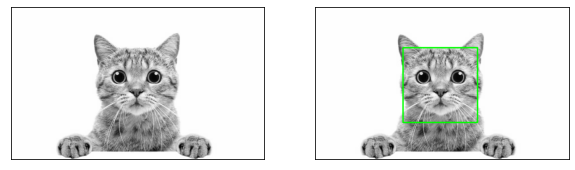

In [ ]:
# Deteksi wajah kucing
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/PCVK_MM/Images/haarcascades/haarcascade_frontalcatface.xml')

# input image
input_image = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/facedet/kucing.jpg')
input_image = cv.cvtColor(input3, cv.COLOR_BGR2RGB)

# Mengubah gambar menjadi grayscale menggunakan fungsi yang telah dibuat sebelumnya
input_image = grayImage(input_image)

# output image 
output_image = input_image.copy()

# deteksi wajah kucing
catFace = cascade_wajah.detectMultiScale(output_image)
(x,y,w,h) = catFace[0]
cv.rectangle(output_image,(x,y),(x+w,y+h),(0,255,0),3)

# Membuat figure dan menampilkan input dan output
plt.figure(figsize = (10,5))
plt.subplot(1,2,1),plt.imshow(input_image)
plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(output_image)
plt.xticks([]), plt.yticks([])
plt.show()

4. Cobakan juga untuk eyes detection.


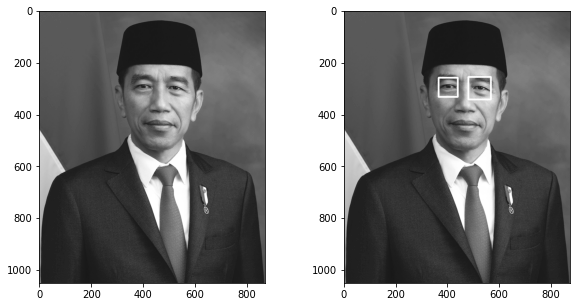

In [ ]:
# eyes detection
cascade_eyes = cv.CascadeClassifier('/content/drive/MyDrive/PCVK_MM/Images/haarcascades/haarcascade_eye.xml')

# input image
input_image = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/facedet/jokowi.jpg', 0)

# output image
output_image = input_image.copy()

# deteksi mata pada gambar
eyes = cascade_eyes.detectMultiScale(output_image)
for(x,y,w,h) in eyes:
    cv.rectangle(output_image,(x,y),(x+w,y+h),(255,255,255),5)

# Membuat figure dan menampilkan input dan output
plt.figure(figsize = (10,5))
plt.subplot(1,2,1),plt.imshow(input_image, cmap='gray')
plt.subplot(1,2,2),plt.imshow(output_image, cmap='gray')
plt.show()

5. Lakukan Face Tracking menggunakan Google Colab. Petunjuk, Tutorial selengkapnya 
tentang akses kamera dan FaceDetection pada google colab dapat dilihat di link 
berikut: https://www.youtube.com/watch?v=YjWh7QvVH60


## Helper Functions
Below are a few helper function to make converting between different image data types and formats. 

In [ ]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

## Haar Cascade Classifier

In [ ]:
# initialize the Haar Cascade face detection model
face_cascade = cv.CascadeClassifier('/content/drive/MyDrive/PCVK_MM/Images/haarcascades/haarcascade_frontalface_alt2.xml')

## Webcam Images
Running code on images taken from webcam is fairly straight-forward. We will utilize code within Google Colab's **Code Snippets** that has a variety of useful code functions to perform various tasks.

We will be using the code snippet for **Camera Capture** to utilize your computer's webcam.

In [ ]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      // Menggunakan webcam laptop
      //const stream = await navigator.mediaDevices.getUserMedia({video: true});
      // Menggunakan device lain
      const stream = await navigator.mediaDevices.getUserMedia({video:{facingMode: "environment"}});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data) 
  # grayscale img
  gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv.imwrite(filename, img)

  return filename

<IPython.core.display.Javascript object>

(480, 640)
Saved to photo.jpg


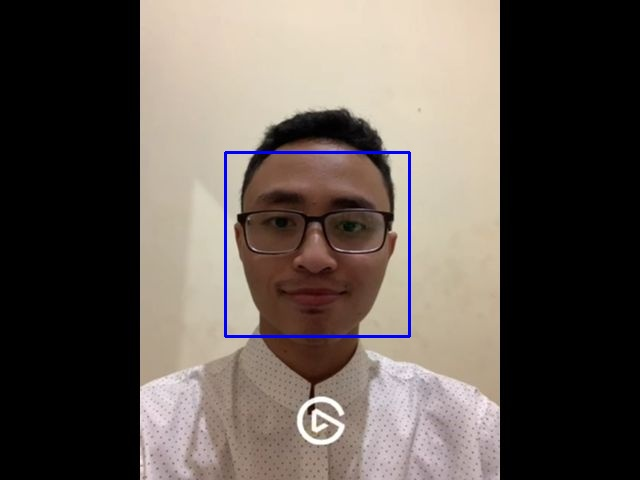

In [ ]:
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

## Webcam Videos
Running code on webcam video is a little more complex than images. We need to start a video stream using our webcam as input. Then we run each frame through our progam (face detection) and create an overlay image that contains bounding box of detection(s). We then overlay the bounding box image back onto the next frame of our video stream.

In [ ]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [ ]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0 
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # grayscale image for face detection
    gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

    # get face region coordinates
    faces = face_cascade.detectMultiScale(gray)
    # get face bounding box for overlay
    for (x,y,w,h) in faces:
      bbox_array = cv.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

<IPython.core.display.Javascript object>

6. Lakukan Blurring pada bagian wajah yang terdeteksi. Berikut contoh keluarannya. 
Petunjuk: anda dapat menggunakan cv.medianBlur untuk melakukan Blurring

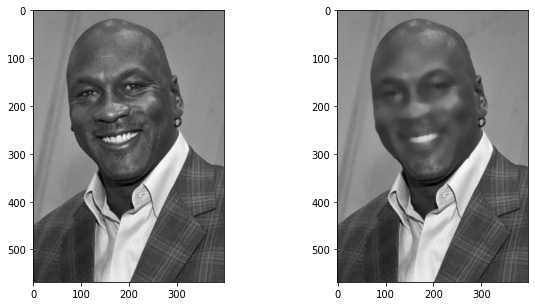

In [ ]:
# Blurring pada bagian wajah
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/PCVK_MM/Images/haarcascades/haarcascade_frontalface_alt2.xml')

# input image
input_image =  cv.imread('/content/drive/MyDrive/PCVK_MM/Images/facedet/mjordan.jpg',0)

# output image
output_image = input_image.copy()

# deteksi wajah
wajah = cascade_wajah.detectMultiScale(output_image)
(x,y,w,h) = wajah[0]
face_image = output_image[y:y+h, x:x+w]

# blur wajah yang terdeteksi
blur_image = cv.medianBlur(face_image, 15)

# Masukkan kembali wajah yang blur ke output image
output_image[y:y+h, x:x+w] = blur_image

# Membuat figure dan menampilkan hasil
plt.figure(figsize = (10,5))
plt.subplot(1,2,1),plt.imshow(input_image, cmap='gray')
plt.subplot(1,2,2),plt.imshow(output_image, cmap='gray')
plt.show()